Copy file dataset dari "shared with me" ke "My Drive"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mendapatkan path ke folder dataset
dataset_path = "/content/drive/MyDrive/Bali Landmark 50 Set"

In [ ]:
import os
import cv2

In [ ]:
os.listdir(dataset_path)

['Monumen Bajra Sandi',
 'Patung Satria Gatotkaca',
 'Patung Dewa Ruci',
 'Patung Nakula Sadewa',
 'Vihara Dharma Giri',
 'Ground Zero',
 'Garuda Wisnu Kencana',
 'Bedugul',
 'Tanah Lot']

Augmentasi Gambar

In [ ]:
# datagen = ImageDataGenerator(
#     rotation_range=10,       # Rentang rotasi dalam derajat
#     width_shift_range=0.1,   # Rentang pergeseran horizontal
#     height_shift_range=0.1,  # Rentang pergeseran vertikal
#     shear_range=0.2,         # Rentang shear
#     zoom_range=0.2,          # Rentang zoom
#     horizontal_flip=True,    # Flip horizontal
#     fill_mode='nearest'      # Metode pengisian piksel yang hilang
# )

# # Augmentasi Per Gambar
# num_augmented_images = 10


# for class_name in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_name)
#     if os.path.isdir(class_path):
#         # Loop melalui setiap gambar dalam kelas
#         for image_name in os.listdir(class_path):
#             image_path = os.path.join(class_path, image_name)
#             # Baca gambar menggunakan OpenCV
#             image = cv2.imread(image_path)
#             # Ubah ukuran gambar menjadi ukuran yang diharapkan oleh generator
#             image = cv2.resize(image, (224, 224))
#             # Ubah dimensi gambar menjadi (1, width, height, channels)
#             image = image.reshape((1,) + image.shape)
#             # Buat generator untuk augmentation
#             aug_generator = datagen.flow(image, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpg')
#             # Generate augmented images dan simpan ke folder yang sama
#             total_augmented = 0
#             for _ in range(num_augmented_images):
#                 augmented_images = aug_generator.next()
#                 total_augmented += 1
#                 if total_augmented >= num_augmented_images:
#                     break

In [ ]:
# Path ke folder tujuan untuk train set dan validation/test set
train_path = "./dataset/train"
val_test_path = "./dataset/test"

# Rasio pembagian train set dan validation/test set
test_size = 0.2

from sklearn.model_selection import train_test_split
import shutil

# Loop melalui setiap kelas dalam dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Membuat folder tujuan untuk kelas pada train set dan validation/test set
        train_class_dir = os.path.join(train_path, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        val_test_class_dir = os.path.join(val_test_path, class_name)
        os.makedirs(val_test_class_dir, exist_ok=True)
        
        # Mendapatkan list semua file gambar dalam kelas
        image_files = [file for file in os.listdir(class_path) if file.endswith(".jpg")]
        
        # Memecah dataset menjadi train set dan validation/test set
        train_files, val_test_files = train_test_split(image_files, test_size=test_size, random_state=42)
        
        # Memindahkan file gambar ke folder tujuan
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(train_class_dir, file)
            shutil.copyfile(src, dst)
        
        for file in val_test_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(val_test_class_dir, file)
            shutil.copyfile(src, dst)

In [ ]:


# Konfigurasi dataset dan direktori
train_dir = train_path
test_dir = val_test_path
input_shape = (224, 224)
batch_size = 32
num_classes = 9

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3853 images belonging to 9 classes.
Found 968 images belonging to 9 classes.


In [ ]:
# # Membangun transfer learning model VGG19
# from tensorflow.keras.applications.vgg19 import VGG19

# base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(4096, activation= 'relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(9, activation= 'softmax'))

# # Compile model
# model.compile(optimizer= tf.keras.optimizers.Adam(0.003),
#                     loss='categorical_crossentropy',
#                     metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

Epoch 1/15
120/120 [==============================] - 35s 163ms/step - loss: 2.2191 - accuracy: 0.1118 - val_loss: 2.1965 - val_accuracy: 0.1125
Epoch 2/15
120/120 [==============================] - 20s 170ms/step - loss: 2.1402 - accuracy: 0.1620 - val_loss: 1.9018 - val_accuracy: 0.2885
Epoch 3/15
120/120 [==============================] - 20s 165ms/step - loss: 1.8243 - accuracy: 0.3107 - val_loss: 1.6501 - val_accuracy: 0.4354
Epoch 4/15
120/120 [==============================] - 20s 169ms/step - loss: 1.6186 - accuracy: 0.4023 - val_loss: 1.3871 - val_accuracy: 0.4844
Epoch 5/15
120/120 [==============================] - 18s 148ms/step - loss: 1.3691 - accuracy: 0.5195 - val_loss: 1.0424 - val_accuracy: 0.6542
Epoch 6/15
120/120 [==============================] - 18s 152ms/step - loss: 1.1615 - accuracy: 0.6077 - val_loss: 0.9346 - val_accuracy: 0.6896
Epoch 7/15
120/120 [==============================] - 20s 167ms/step - loss: 0.9316 - accuracy: 0.6883 - val_loss: 0.7287 - val_ac

In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

31/31 - 3s - loss: 0.2665 - accuracy: 0.9339 - 3s/epoch - 107ms/step
Test accuracy: 0.93388432264328


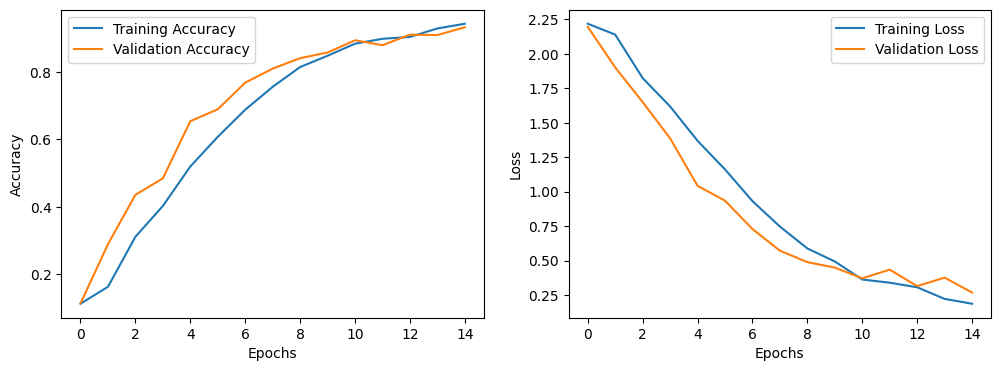

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
from google.colab import files

# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

for filename in uploaded.keys():
    loc = ('/content/' + filename)
    print(loc)

Saving baliomtours-puratanahlot.jpg to baliomtours-puratanahlot.jpg
/content/baliomtours-puratanahlot.jpg


1/1 [==============================] - 0s 26ms/step
Prediksi: Tanah Lot
Kepercayaan: 0.99605185


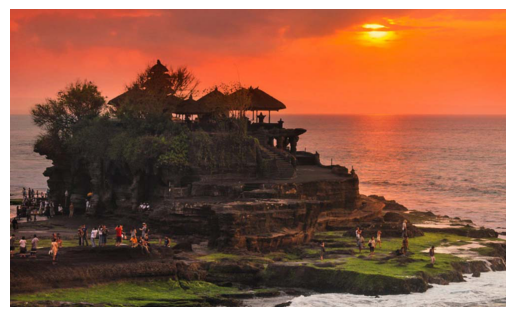

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
import numpy as np


# # Fungsi untuk memuat gambar dari URL atau direktori file
def load_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# path gambar yang ingin diprediksi
image_path = loc

# Load dan preproses gambar
image = load_image(image_path)
# Atau: image = load_image(image_path)

# Melakukan prediksi
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Label kelas yang sesuai dengan prediksi
class_labels = ['Bedugul','Garuda Wisnu Kencana','Ground Zero','Monumen Bajra Sandi','Patung Dewa Ruci','Patung Nakula Sadewa','Patung Satria Gatotkaca','Tanah Lot', 'Vihara Dharma Giri']
predicted_label = class_labels[predicted_class]

print('Prediksi:', predicted_label)
print('Kepercayaan:', confidence)

img = mpimg.imread(loc)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/TraveLens/model.hdf5')

In [ ]:
#Convert ke TF Lite
import tensorflow as tf

#Load model yang telah disimpah
final_model = tf.keras.models.load_model(filepath="model.h5")

#Convert model tsb ke bentuk TF Lite
conversion = tf.lite.TFLiteConverter.from_keras_model(final_model)
model_tflite = conversion.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('model_cnn_TravelLens', 'wb') as f:
  f.write(model_tflite)

In [ ]:
#Simpan model akhir
model.save("model.h5")
tf.keras.models.save_model(model,'/content/drive/MyDrive/TraveLens/model_cnn_TravelLens.hdf5')
#Simpan juga model akhir dalam bentuk json

model_json = model.to_json()
with open("model_json", "w") as file_json:
    file_json.write(model_json)
